In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "bayesian_network"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.052738,-0.044642,-0.018062,-0.040099,-0.023584,-0.011335,-0.002903,-0.039493,0.057104,-0.001078,270.0
1,-0.001882,0.050680,0.033673,0.125158,0.024574,0.026243,-0.002903,-0.002592,0.008640,0.003064,197.0
2,0.005383,0.050680,0.017506,0.032201,0.127771,0.127390,-0.021311,0.071210,0.062575,0.015491,139.0
3,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052959,0.027917,39.0
4,0.070769,-0.044642,0.046607,0.014987,-0.096510,-0.047034,0.000779,-0.076395,-0.061177,-0.046641,66.0
5,0.070769,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.036038,0.039106,-0.014956,-0.050783,53.0
6,0.063504,0.050680,-0.009439,0.011544,0.001183,0.037517,-0.013948,0.034309,0.029300,0.073480,83.0
7,-0.052738,0.050680,-0.062252,0.011544,-0.008449,-0.036700,0.122273,-0.076395,-0.086829,0.003064,45.0
8,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
9,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0


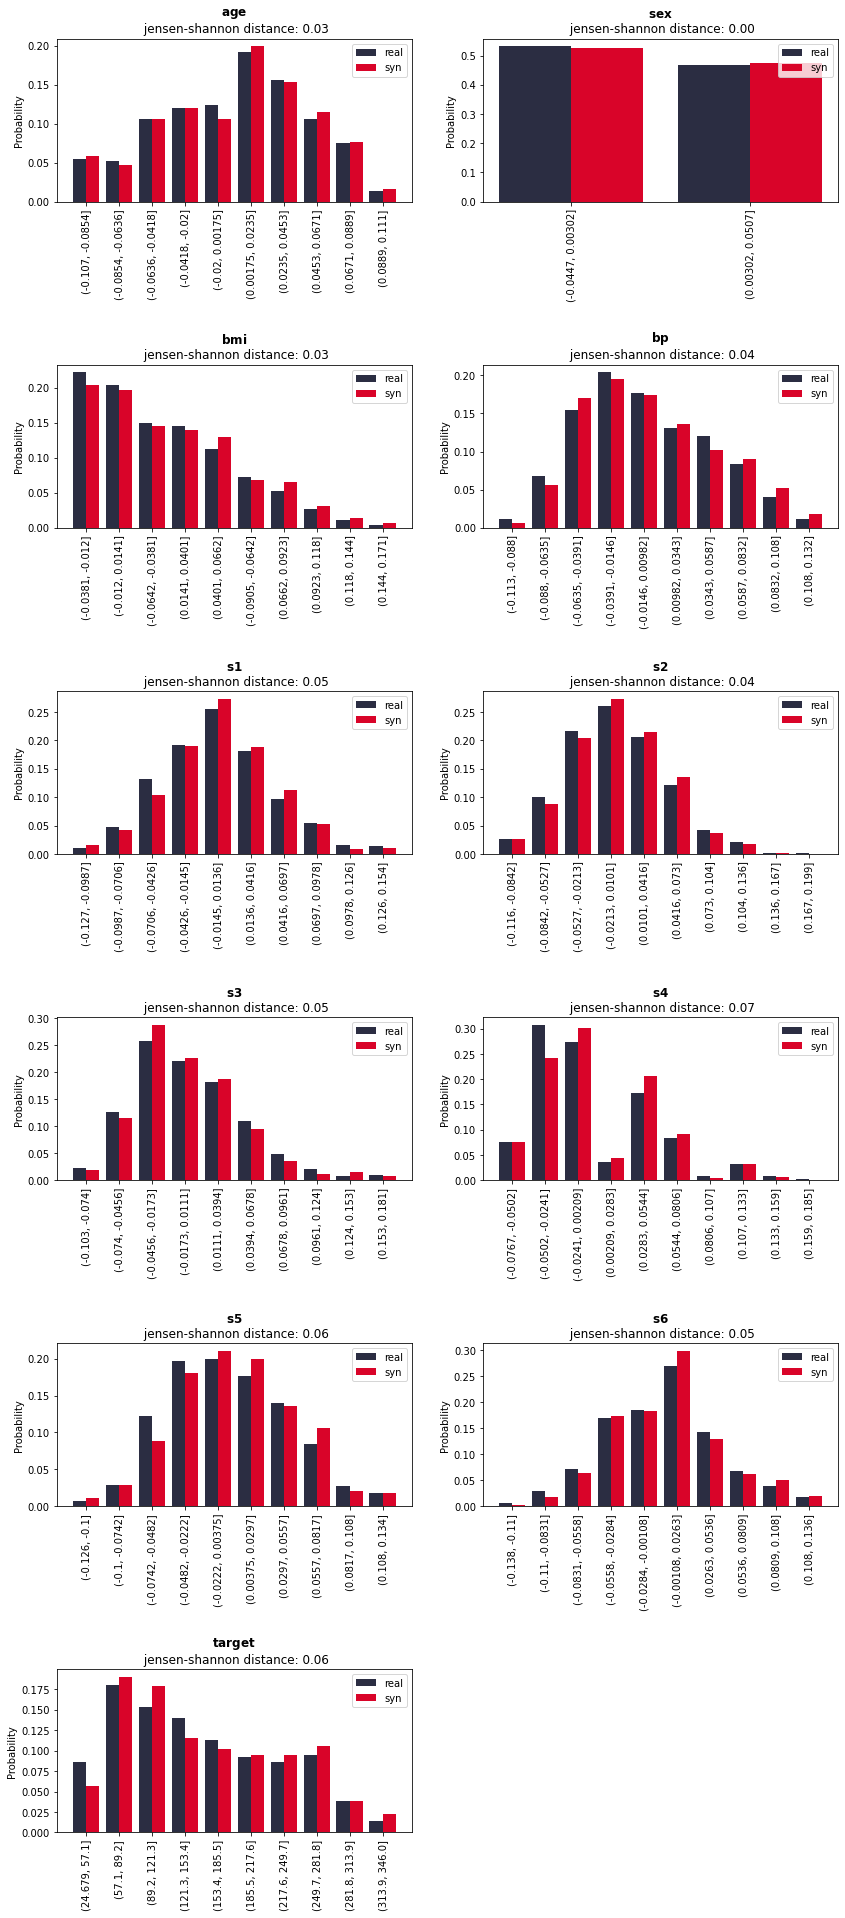

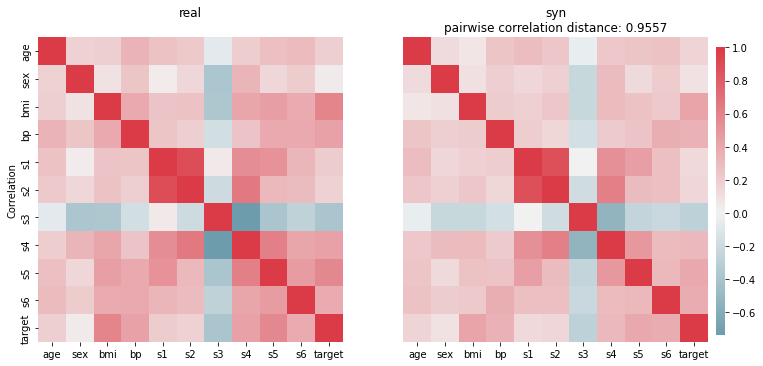

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : bayesian_network


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.282805,0.294118,2.873303e-01,0.004887,0.285068,0.005656,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.026260,0.041701,3.152596e-02,0.007197,0.026617,0.007721,3,0,0.01
sanity.inlier_probability,0.977376,0.984163,9.803922e-01,0.002822,0.979638,0.003394,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,3.016591e-03,0.001067,0.002262,0.001131,3,0,0.01
statistical.marginal.jensenshannon_distance,0.041115,0.051464,4.501502e-02,0.004593,0.042466,0.005175,3,0,0.19
statistical.marginal.chi_squared_test,0.725959,0.996391,9.057957e-01,0.127165,0.995038,0.135216,3,0,0.03
statistical.joint.feature_correlation,0.970262,1.210512,1.070619e+00,0.101988,1.031084,0.120125,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.171667,0.177711,1.741377e-01,0.002588,0.173036,0.003022,3,0,3.80
statistical.marginal.inverse_kl_divergence,0.969170,0.992434,9.846646e-01,0.010956,0.992390,0.011632,3,0,0.02
